### Intriduction 

Bike sharing companies allow people to rent bikes for short trips. Someone can rent a bike from a station near their location, take a ride, and then return the bike to any other station.

Our dataset describes the daily activity of Capital Bikeshare (a bike-sharing company). Let's take a look at the first five rows:

Each row describes the number of bike rentals for a single day and the corresponding weather. The data spans a period of two years (January 1, 2011 – December 31, 2012). Here are some of the columns we'll be focusing on :

* dteday: date in year-month-day format.
* temp: normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).
* atemp: normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).
* hum: normalized humidity.
* windspeed: normalized wind speed.
* casual: the number of casual (non-registered) people who rented a bike that day.
* registered: the number of registered people who rented a bike that day (registered people bought a membership).
* cnt: the total number of people who rented a bike (casual plus registered).

Researcher [Hadi Fanaee-T](https://www.researchgate.net/profile/Hadi-Fanaee-T) collected the dataset, and it can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

Let's read in the dataset using pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')

print (bike_sharing.head())
print('\n')
print (bike_sharing.tail())
print('\n')
print (bike_sharing.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


     instant      dteday

We can start by visualizing how the total number of bike rentals changed over time.

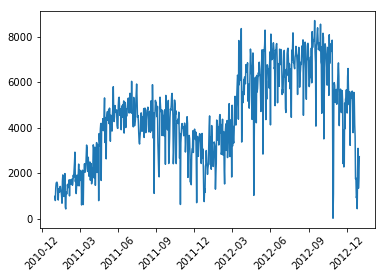

In [3]:
bike_sharing["dteday"] = pd.to_datetime(bike_sharing['dteday'])

plt.plot(bike_sharing["dteday"],bike_sharing["cnt"] )
plt.xticks(rotation=45)                         # We use this to rotate the x axis into 45 degrees for a better visualisation
plt.show()

Now, we would like using a graph, to compare the evolution on time for the casual people and the registered ones renting the byc.

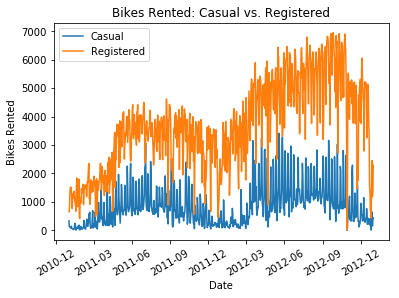

In [4]:
plt.plot(bike_sharing['dteday'], bike_sharing['casual'], label = 'Casual')
plt.plot(bike_sharing['dteday'], bike_sharing['registered'], label = 'Registered')
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Bikes Rented')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend()
plt.show()

### Seasonal Trends

previously, we started by creating a line graph to examine how the total number of bike rentals changed over time.

Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the summer months are June-August, and the winter months are December-February).

In fact, we see quite a few similar patterns for both 2011 and 2012 with respect to the number of rented bikes:

* The number keeps increasing in the January-May interval.
* We see a plateau in the May-September interval, where the number of rentals stays high but constant (it neither increases nor decreases very much).
* The number keeps decreasing in the September-December interval.

We observe specific patterns occurring regularly at specific intervals of time; these similarities are seasonal trends.

Weather, holidays, school vacations and other factors can often cause seasonality. 

In our case, what could be causing the seasonality in the number of rented bikes?

Biking is an outdoor activity, and people often don't ride when it's too cold outside. The wind feels very cold when you're moving.

Let's see if we can find any similarity between how air temperature and the number of bikes rented changed over the course of 2011 and 2012.

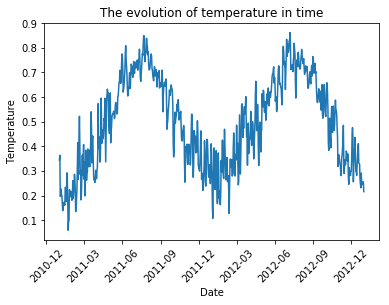

In [5]:
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.title("The evolution of temperature in time")
plt.show()

On the last screen, we've plotted dteday against cnt on a line graph, and we identified a few seasonal trends. We hypothesized that this seasonality might be related to temperature variations.

The similarity in how the air temperature and the number of rented bikes changed over 2011 and 2012 supports this hypothesis.

We see that when the temperature grows, the number of bike rentals tends to grow too. When the temperature decreases, the number of rentals tends to decrease too. Although the relationship isn't perfect, the values in the two columns follow similar patterns in how they change.

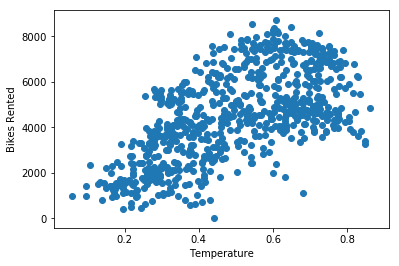

In [6]:
# Checking the correlation between the temperature and the rented bikes 

plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

One thing we notice in the scatter plot above is that the overall direction of the points is upward (seen from left to right). This is because as the temperature increases, the number of bike rentals tends to grow too.

Seen from right to left, the direction of the points is downward — as the temperature decreases, the number of rentals also tends to decrease.

Let's now plot windspeed against cnt on a scatter plot. We expect the direction of the points to be ... considering that a strong wind can cause people to rent fewer bikes.

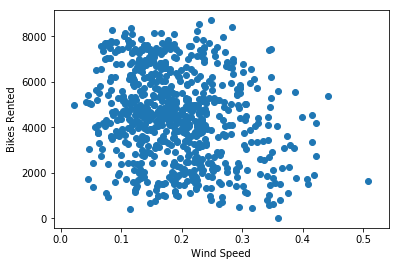

In [7]:
plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.xlabel("Wind Speed")
plt.ylabel("Bikes Rented")
plt.show()

### Correlation and Measuring Pearson's r

The general direction of the points (seen from left to right) is different on the two plots:

temp versus cnt shows an upward trend
windspeed versus cnt shows a downward trend (approximately)
Both the temp and the windpseed columns relate to the cnt column, but in a different way.

When the values in temp increase, the values in cnt tend to go up as well (and vice versa). When the values in temp decrease, the values in cnt tend to go down as well (and vice versa).

On the other side, when the values in windspeed increase, the values in cnt don't go up — they tend to decrease instead. When the values in windspeed decrease, the values in cnt tend to go up (and vice versa).

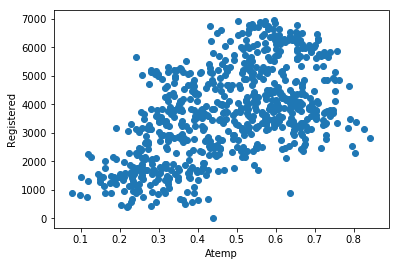

In [8]:
plt.scatter(bike_sharing['atemp'], bike_sharing['registered'])
plt.xlabel('Atemp')
plt.ylabel('Registered')
plt.show()

From the scatter above, we observe that there is a positive correlation between the the number of registered people who rented a bike that day and normalized feeling temperature.

Now, we explore the pearson's r correlation between the temperature and the number of rented bike, and then between the windspeed and the number of rented bike.

In [9]:
print ("The pearson's r correlation between the temperature and le rented bike is", bike_sharing['temp'].corr(bike_sharing['cnt']))

print ("The pearson's r correlation between the windspeed and the number rented bike is",bike_sharing['windspeed'].corr(bike_sharing['cnt']))

The pearson's r correlation between the temperature and le rented bike is 0.627494009033
The pearson's r correlation between the windspeed and the number rented bike is -0.234544997422


Now, let's display the correleations of all numeric columns in our contained in our DataFrame bike_sharing.

In [10]:
bike_sharing.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Now, let's have a look at only these three columns : cnt, casual and registered.

In [11]:
bike_sharing.corr()[['cnt', 'casual', 'registered']]

,cnt,casual,registered
instant,0.628830,0.275255,0.659623
season,0.406100,0.210399,0.411623
yr,0.566710,0.248546,0.594248
mnth,0.279977,0.123006,0.293488
holiday,-0.068348,0.054274,-0.108745
weekday,0.067443,0.059923,0.057367
workingday,0.061156,-0.518044,0.303907
weathersit,-0.297391,-0.247353,-0.260388
temp,0.627494,0.543285,0.540012
atemp,0.631066,0.543864,0.544192


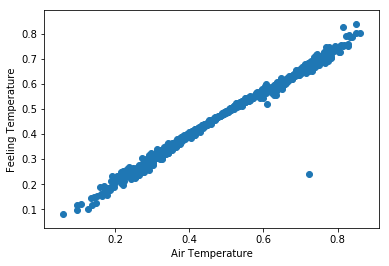

/n


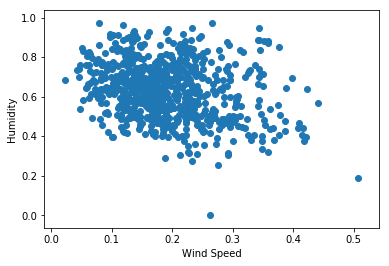

In [12]:
# pearson correlation between Air Temperature and Feeling Temperature
temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])

# pearson correlation between Humidity and windspeed
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])

plt.scatter(bike_sharing['temp'], bike_sharing['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()

print('/n')

plt.scatter(bike_sharing['windspeed'], bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()

In [13]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

From the result above, we can easily see that the workingday column describes the type of day: a working day or a non-working day (weekend or holiday).

Although it's categorical, the workingday column is encoded with numbers (1 means a working day and 0 means a non-working day).

Let's calculate its correlation with the casual and registered columns.

In [14]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

We can see a negative correlation with the casual column (-0.52), and a positive correlation with the registered column (+0.30).

These values suggest that registered users tend to use the bikes more on working days (to commute to work probably), while casual (non-registered) users tend to rent the bikes more on the weekends and holidays (maybe to spend some leisure time).

Now, We're going to use the weathersit column, which is categorical and has four unique values describing the weather:

* 1: clear or few clouds
* 2: mist or cloudy
* 3: light rain, light snow, thunderstorm
* 4: heavy rain, snow, ice pellets, fog

And we observe the following :

* The worse the weather, the higher the encoding number in the weathersit column. 
* The correlation between weathersit and cnt is -0.30 ; this means that as the weather gets worse, the number of bike rentals tends to decrease.
* The correlation between weathersit and hum is +0.59; this means that as the humidity decreases, the weather tends to get better.

Now, let's further explore the rentals for casual and registered users on working and non-working days.

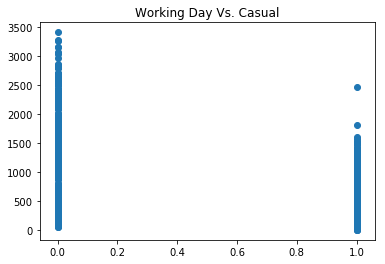

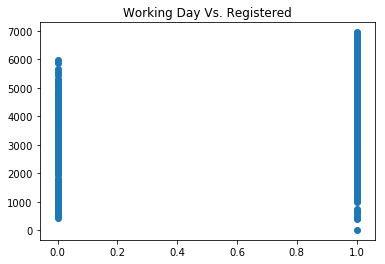

In [15]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title('Working Day Vs. Casual')
plt.show()

plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered')
plt.show()

On the previous screen, we found a pattern that is potentially true: registered users tend to use the bikes more on the working days, while casual users tend to rent the bikes more on the weekends and holidays.

Now, let's compute the average of the casual and registered in working and no working days.

In [16]:
no_workingday = bike_sharing[bike_sharing['workingday'] == 0]
avg_casual_no_workingday = no_workingday['casual'].mean()
avg_registered_no_workingday= no_workingday['registered'].mean()

workingday = bike_sharing[bike_sharing['workingday'] == 1]
avg_casual_workingday = workingday['casual'].mean()
avg_registered_workingday= workingday['registered'].mean()

print("The average casual on no working day is", avg_casual_no_workingday )
print("The average registered on no working day is", avg_registered_no_workingday )
print("The average casual on working day is", avg_casual_workingday )
print("The average casual on working day is", avg_registered_workingday )


The average casual on no working day is 1371.1341991341992
The average registered on no working day is 2959.034632034632
The average casual on working day is 606.57
The average casual on working day is 3978.25


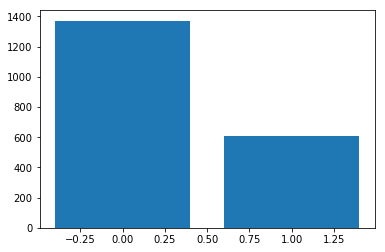

In [17]:
working_days = [0,1]
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.show()

In our bar plot above, we see two vertical blue bars. The bar on the left corresponds to the non-working day category, and the one on the right to the working day category.

The bar on the left is higher — it's more than twice as tall as the one on the right. That's because on non-working days casual users rent on average more than double the number of bikes they rent on working days.

The height of each bar corresponds to the values in the casual_avg list — the left bar corresponds to the value 1,371, and the right one corresponds to 607. Essentially, the height is a y-coordinate.

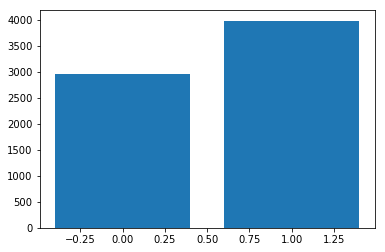

In [18]:
# String to be fixed 
import matplotlib.pyplot as plt
# working_days = ['Non-Working Day', 'Working Day']
working_days = [0, 1]
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.show()

Previously, we saw that the data indicates that registered users tend to use the bikes more on working days, while casual users tend to rent the bikes more on weekends and holidays.

We can also take a more granular approach to analyzing the data and examine the average number of rentals for casual and registered users based on the day of the week (Monday, Tuesday, Wednesday, etc.).

The weekday column in our dataset describes the day of the week (0 is Sunday, and 6 is Saturday)

In [19]:
bike_sharing['weekday'].value_counts().sort_index()
# We use Series.sort_index() to sort the index in an ascending order

0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: weekday, dtype: int64

Now, let's calcule the average for each day of the week for the casual and the registered 

In [20]:
def avg (x) :
    selected = bike_sharing[bike_sharing['weekday'] == x]
    avg_casual = selected['casual'].mean()
    avg_registered= selected['registered'].mean()
    return [avg_casual, avg_registered]

averages = {}
for n in bike_sharing['weekday'] :
    average = avg(n)
    averages[n] = average

averages = pd.DataFrame(averages)                            # We change the dictionnary into pandas dataframe
averages = averages.T
averages["weekday"] = averages.index
averages.columns = ['casual_average', 'registered_average','weekday']
averages

,casual_average,registered_average,weekday
0,1338.295238,2890.533333,0
1,674.133333,3663.990476,1
2,556.182692,3954.480769,2
3,551.144231,3997.394231,3
4,590.961538,4076.298077,4
5,752.288462,3938.000000,5
6,1465.257143,3085.285714,6


Now, let's generate a bar plot for the casual column in our table above.

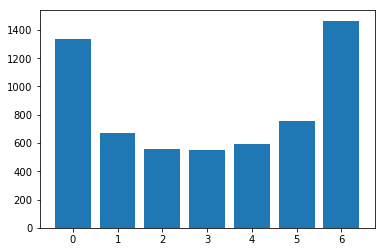

In [21]:
plt.bar(averages["weekday"],averages['casual_average'])
plt.show()

The first bar (Sunday) and the last one (Saturday) are more than twice as tall as all the other bars. This shows that casual users rent more bikes on the weekends, which corroborates our initial findings.

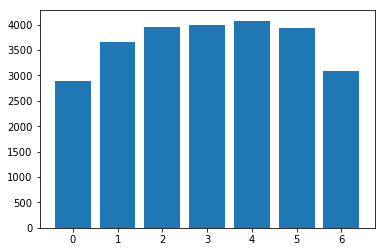

In [22]:
# Now, let's explore the weekly average for the registered using bar plot.

plt.bar(averages["weekday"],averages['registered_average'])
plt.show()

Likewise, we observe that the first bar (Sunday) and the last one (Saturday) are shorter than the other bars. This shows that registered users rent more bikes on the week days, which corroborates our initial findings.

Our dataset describes bike sharing activity for the Capital Bikeshare company in Washington, D.C. Let's say the company has decided to open up a new bike sharing system in another American city.

Weather patterns are going to play an important part in choosing the next location. We're asked to pull up some weather data about Washington, D.C. — the decision-making team wants to use that as a benchmark for evaluating other cities.

One useful column is weathersit, which describes the daily weather type. Let's look at the unique values and the number of times each occurs:

In [23]:
bike_sharing['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

We only see three unique values above, but, according to the documentation, the weathersit column has four unique values (4 has a frequency of zero as a consequence)

Now, we're going to visualize weather patterns in Washington, D.C. for 2011 and 2012 individually. This will help us see if the weather is consistent from year to year.


In the code editor below, we define the following :

* The list unique_values: all the unique values of the weathersit column.
* The list weather_2011: the frequency of each unique value for the year 2011 only — for instance, the unique value 1 occurred 226 times in 2011, 2 occurred 124 times, and so on.
* The list weather_2012: the frequency of each unique value for the year 2012 only.

We'll generate the bar plot for 2011 and 2012.

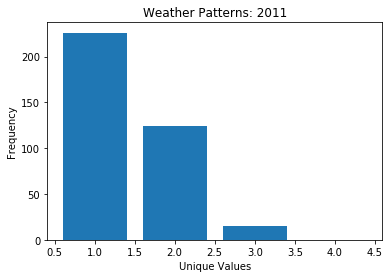

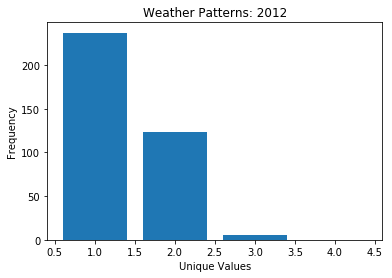

In [28]:
unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

plt.bar(unique_values, weather_2011)
# plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

plt.bar(unique_values, weather_2012)
#plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2012')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

Previously, we generated a frequency table for the weathersit column.

In [29]:
bike_sharing['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

We observe that for most days (463 days), the sky is clear or has a few clouds. However, there are also days (247 days) where we see mist or the sky is cloudy.

Quite rarely (21 days in two years), we have light rains, light snows, or thunderstorms. Also, heavy rains or snows are extremely rare in Washington, D.C. (no occurrences in 2011 and 2012).

However, if we generate a frequency table for the cnt column (which describes the total number of bike rentals), it's almost impossible to distinguish any pattern. And that's because cnt has 696 unique values (below, we see a truncated table).

In [30]:
bike_sharing['cnt'].value_counts()

5119    2
4401    2
1977    2
6824    2
5191    2
1096    2
5202    2
5847    2
5312    2
4758    2
6043    2
5698    2
1685    2
6591    2
4274    2
4195    2
3974    2
6536    2
4459    2
6883    2
7534    2
1162    2
2424    2
2425    2
3214    2
4649    2
5260    2
4073    2
2077    2
4098    2
       ..
8156    1
3709    1
5905    1
6779    1
6778    1
2710    1
4727    1
7393    1
5743    1
5463    1
1712    1
7282    1
5786    1
6830    1
5805    1
1708    1
683     1
6825    1
2743    1
4773    1
3747    1
3744    1
1693    1
3740    1
4763    1
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 696, dtype: int64

To solve this problem, we can group the unique values into equal intervals. Below, we group the table into ten equal intervals by using the bins=10 argument inside the Series.value_counts() method:

In [31]:
bike_sharing['cnt'].value_counts(bins=10)

(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64

The unique values are now number intervals.

We can better understand the structure of the table above if we sort the intervals in ascending order

In [34]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

From the result above, we observe the following :
    
* The days when the number of rentals goes under 890 are very rare

* Most typically, the number of bike rentals per day varies between 4369 and 5237

* The days when the number of bike rentals goes over 7845 are very rare

Now, we're going to generate grouped frequency tables for the registered and casual columns.

In [35]:
registered_freq = bike_sharing['registered'].value_counts(bins = 10).sort_index()

casual_freq = bike_sharing['casual'].value_counts(bins = 10).sort_index()

Now, let's explore the cnt frequency using histogram 

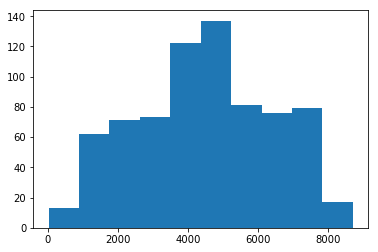

In [37]:
plt.hist(bike_sharing['cnt'])
plt.show()

Looking at the histogram we generated for the cnt column, we can make a few quick observations about the following:

* Range: Over the two years (2011 and 2012), the values ranged between 0 and 9,000 bike rentals.
* The distribution of the bike rentals: 
    * Most typically, the number of bike rentals per day varies between 4,500 and 5,000 — the tallest bar is around that interval. The height of that bar indicates that we had about 140 days when rentals were between 4,500 and 5,000.
    * For most days, the number of rentals ranges between 1,000 and 7,500 — we see the tallest bars around this larger interval.
    * Most uncommonly, the number of rentals per day goes under 1,000 or over 8,000 — the bars are short around these values, with a frequency of 20 or less.
    
Moreover, the distribution frequency above is approximately a notmal distribution. This immediately tells us that most values lie in the middle, and the frequencies gradually decrease toward the extremities.
    
    
Let's now explore the histogram for the casual case.

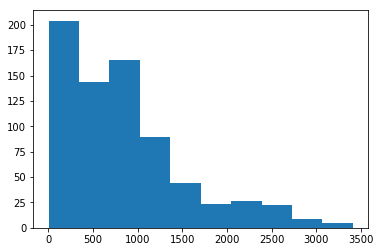

In [39]:
plt.hist(bike_sharing['casual'])
plt.show()

We observe the following :
  
* Range: Over the two years (2011 and 2012), the values ranged between 0 and 3500 casual.

* Most typically, the number of casual rentals per day varies between 0 and 500 — the tallest bar is around that interval. The height of that bar indicates that we had about 200 days when casual rentals were between 0 and 500.

* Most uncommonly, the number of casual rentals per day goes over 3500 — the bars are short around this value, with a frequency of 15 or less.

The casual histogram shows a skewed distribution. In a skewed distribution.